# Replicating Mendenhall's Characteristic Curves

## Load the first chapter of Oliver Twist

In [103]:
with open('../data/oliver_twist_1.txt') as f:
    chapter_1 = f.read()

with open('../data/oliver_twist_2.txt') as f:
    chapter_2 = f.read()

In [105]:
print(chapter_2)

Chapter II. Treats of Oliver Twist's Growth, Education, and Board. For the next eight or ten months, Oliver was the victim of a systematic course of treachery and deception — he was brought up by hand. The hungry and destitute situation of the infant orphan was duly reported by the workhouse authorities to the parish authorities. The parish authorities inquired with dignity of the workhouse authorities, whether there was no female then domiciled in "the house" who was in a situation to impart to Oliver Twist the consolation and nourishment of which he stood in need. The workhouse authorities replied with humility that there was not. Upon this, the parish authorities magnanimously and humanely resolved, that Oliver should be "farmed," or, in other words, that he should be despatched to a branch-workhouse some three miles off, where twenty or thirty other juvenile offenders against the poor-laws rolled about the floor all day, without the inconvenience of too much food or too much clothi

We do not know how Mendenhall tokenized the text, or where he started. We will try a few variations to match his data the best.

In [123]:
import string
import re

# function to remove punctuation
def remove_punctuation(text, keep_hyphenated=True, keep_contracted=True):

    # replace '—' with ' '
    # this is more like punctuation
    text = text.replace('—', ' ')

    # replace all punctuation with ' '
    for char in string.punctuation:
        if keep_hyphenated and keep_contracted:
            if char not in ['-', '\'']:
                text = text.replace(char, ' ')
        elif keep_hyphenated:
            if char != '-':
                text = text.replace(char, ' ')
        elif keep_contracted:
            if char != '\'':
                text = text.replace(char, ' ')
        else:
            text = text.replace(char, ' ')
    
    # replace ' surronded by whitespace with nothing
    text = text.replace('\' ', ' ')
    text = text.replace(' \'', ' ')

    # replace all whitespace with ' '
    text = ' '.join(text.split())

    return text

def remove_title(text,):
    title = None

    if "Chapter I." in text:
        title = "Oliver Twist. Chapter I. Treats of the Place Where Oliver Twist Was Born and of the Circumstances Attending His Birth. "
    if "Chapter II." in text:
        title = "Chapter II. Treats of Oliver Twist's Growth, Education, and Board. "
    
    if title is None:
        return text
    else:
        return text.replace(title, '')

# now, we can generate all possible methodological variations of counting tokens
def retrieve_tokens(text, token_count=1000):

    tokens_dict = {}
    tokens_dict['title_no_hyphen_no_contracted_no'] = remove_punctuation(
        remove_title(text), keep_hyphenated=False, keep_contracted=False
        ).split()
    tokens_dict['title_no_hyphen_no_contracted_yes'] = remove_punctuation(
        remove_title(text), keep_hyphenated=False, keep_contracted=True
        ).split()
    tokens_dict['title_no_hyphen_yes_contracted_no'] = remove_punctuation(
        remove_title(text), keep_hyphenated=True, keep_contracted=False
        ).split()
    tokens_dict['title_no_hyphen_yes_contracted_yes'] = remove_punctuation(
        remove_title(text), keep_hyphenated=True, keep_contracted=True
        ).split()
    tokens_dict['title_yes_hyphen_no_contracted_no'] = remove_punctuation(
        remove_title(text), keep_hyphenated=True, keep_contracted=False
        ).split()
    tokens_dict['title_yes_hyphen_no_contracted_yes'] = remove_punctuation(
        remove_title(text), keep_hyphenated=True, keep_contracted=True
        ).split()
    tokens_dict['title_yes_hyphen_yes_contracted_no'] = remove_punctuation(
        remove_title(text), keep_hyphenated=True, keep_contracted=False
        ).split()
    tokens_dict['title_yes_hyphen_yes_contracted_yes'] = remove_punctuation(
        remove_title(text), keep_hyphenated=True, keep_contracted=True
        ).split()
    
    for key in tokens_dict:
        print(key, len(tokens_dict[key]))
        tokens_dict[key] = tokens_dict[key][:token_count]
    
    return tokens_dict


In [124]:
# concatenate chapters, because we will need 1000 and 5000 tokens
text = chapter_1 + ' ' + chapter_2
tokens_dict_1000 = retrieve_tokens(text, token_count=1000)
tokens_dict_5000 = retrieve_tokens(text, token_count=5000)


title_no_hyphen_no_contracted_no 5166
title_no_hyphen_no_contracted_yes 5121
title_no_hyphen_yes_contracted_no 5133
title_no_hyphen_yes_contracted_yes 5088
title_yes_hyphen_no_contracted_no 5133
title_yes_hyphen_no_contracted_yes 5088
title_yes_hyphen_yes_contracted_no 5133
title_yes_hyphen_yes_contracted_yes 5088
title_no_hyphen_no_contracted_no 5166
title_no_hyphen_no_contracted_yes 5121
title_no_hyphen_yes_contracted_no 5133
title_no_hyphen_yes_contracted_yes 5088
title_yes_hyphen_no_contracted_no 5133
title_yes_hyphen_no_contracted_yes 5088
title_yes_hyphen_yes_contracted_no 5133
title_yes_hyphen_yes_contracted_yes 5088


In [125]:
# now, we want to divide the set of 5000 into 5 sets of 1000
tokens_dict_1000_1 = {}
tokens_dict_1000_2 = {}
tokens_dict_1000_3 = {}
tokens_dict_1000_4 = {}
tokens_dict_1000_5 = {}

for key in tokens_dict_5000:
    tokens_dict_1000_1[key] = tokens_dict_5000[key][:1000]
    tokens_dict_1000_2[key] = tokens_dict_5000[key][1000:2000]
    tokens_dict_1000_3[key] = tokens_dict_5000[key][2000:3000]
    tokens_dict_1000_4[key] = tokens_dict_5000[key][3000:4000]
    tokens_dict_1000_5[key] = tokens_dict_5000[key][4000:5000]

In [126]:
# print the lengths of the tokens
for key in tokens_dict_1000_1:
    print(key, len(tokens_dict_1000_1[key]), len(tokens_dict_1000_2[key]), len(tokens_dict_1000_3[key]), len(tokens_dict_1000_4[key]), len(tokens_dict_1000_5[key]))

title_no_hyphen_no_contracted_no 1000 1000 1000 1000 1000
title_no_hyphen_no_contracted_yes 1000 1000 1000 1000 1000
title_no_hyphen_yes_contracted_no 1000 1000 1000 1000 1000
title_no_hyphen_yes_contracted_yes 1000 1000 1000 1000 1000
title_yes_hyphen_no_contracted_no 1000 1000 1000 1000 1000
title_yes_hyphen_no_contracted_yes 1000 1000 1000 1000 1000
title_yes_hyphen_yes_contracted_no 1000 1000 1000 1000 1000
title_yes_hyphen_yes_contracted_yes 1000 1000 1000 1000 1000


In [130]:
# get the number of words of particular lengths for each set of 1000 tokens
def get_word_lengths(tokens_dict):
    word_lengths = {}
    for key in tokens_dict:
        word_lengths[key] = {}
        for token in tokens_dict[key]:
            if len(token) in word_lengths[key]:
                word_lengths[key][len(token)] += 1
            else:
                word_lengths[key][len(token)] = 1
    return word_lengths

word_lengths_1000_1 = get_word_lengths(tokens_dict_1000_1)
word_lengths_1000_2 = get_word_lengths(tokens_dict_1000_2)
word_lengths_1000_3 = get_word_lengths(tokens_dict_1000_3)
word_lengths_1000_4 = get_word_lengths(tokens_dict_1000_4)
word_lengths_1000_5 = get_word_lengths(tokens_dict_1000_5)

word_lengths = [word_lengths_1000_1, word_lengths_1000_2, word_lengths_1000_3, word_lengths_1000_4, word_lengths_1000_5]

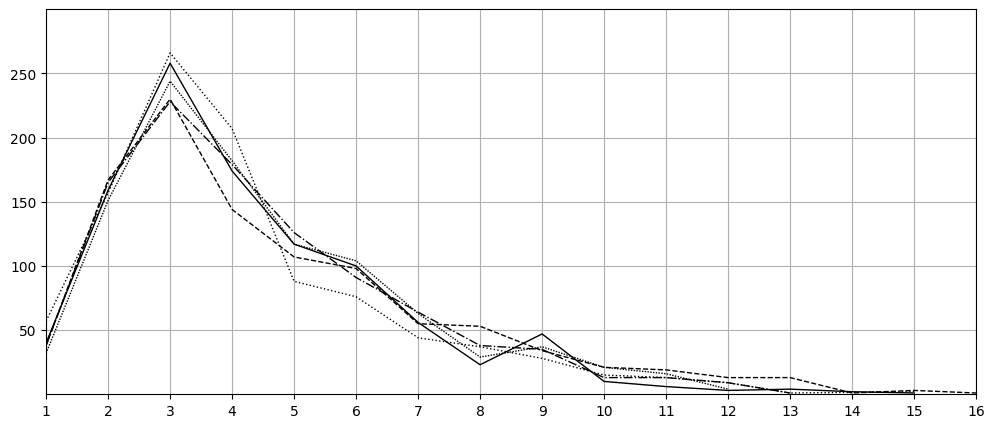

In [147]:
# plot all of the data for 'with_title_with_hyphens_and_contractions' on one plot
import matplotlib.pyplot as plt

# plot the data
fig, ax = plt.subplots()

# line styles
linestyles = [
    ('dashdot', '-.'),
    ('dashed', '--'),
    
    ('dotted', ':'),
    ('solid', '-'),
    ('densely dotted', (0, (1, 1)))
]

used_linestyles = []

for i in range(5):
    keys = list(word_lengths[i]['title_yes_hyphen_yes_contracted_yes'].keys())
    values = list(word_lengths[i]['title_yes_hyphen_yes_contracted_yes'].values())
    # sort the data
    keys, values = zip(*sorted(zip(keys, values)))
    ax.plot(keys, values, label=f'Set {i+1}', linestyle=linestyles[i][1], color='black', linewidth=1)


# add a grid
ax.grid(True)

# modify x-ticks so that 1 is the first tick and 16 is the last tick
ax.set_xticks(range(1, 17))
ax.set_xlim(1, 16)

# modify y range to 0-300, but don't show 0 or 300
ax.set_ylim(0, 300)
ax.set_yticks(range(50, 300, 50))

# modify figure size so that the grid is square
fig.set_size_inches(12, 5)

# show the plot
plt.show()


In [150]:
# save the data for the plot
columns = ['Length', 'Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5']
data = []
for i in range(1, 17):
    row = [i]
    for j in range(5):
        row.append(word_lengths[j]['title_yes_hyphen_yes_contracted_yes'].get(i, 0))
    data.append(row)
import pandas as pd
df = pd.DataFrame(data, columns=columns)

df.to_csv('../data/word_lengths.csv', index=False)

In [151]:
df

,Length,Set 1,Set 2,Set 3,Set 4,Set 5
0,1,38,38,57,40,32
1,2,165,167,157,159,151
2,3,228,230,266,258,244
3,4,179,144,207,174,182
4,5,126,107,88,117,117
5,6,91,98,76,100,104
6,7,64,55,44,56,63
7,8,38,53,37,23,29
8,9,35,34,28,47,37
9,10,13,21,15,10,21


Number of letters 1 2 3 4 56 7 8 9 10 11 12
 Number of words 38 170 235 175 123 91 62 41 35 10 13 7

In [57]:
# let's get the original data
data = {
    "number_of_letters": [1,2,3,4,5,6,7,8,9,10,11,12],
    "number_of_words (original)": [38, 170, 235, 175, 123, 91, 62, 41, 35, 10, 13, 7]
}

# and add the new data
for snippet in word_length_counts:
    data[f"number_of_words ({snippet})"] = [word_length_counts[snippet].get(i, 0) for i in data["number_of_letters"]]
print(data)

{'number_of_letters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'number_of_words (original)': [38, 170, 235, 175, 123, 91, 62, 41, 35, 10, 13, 7], 'number_of_words (without_title_with_hyphens_and_contractions)': [39, 167, 226, 183, 124, 89, 63, 40, 34, 13, 13, 9], 'number_of_words (without_title_with_hyphens)': [46, 169, 226, 178, 124, 88, 61, 40, 34, 12, 13, 9], 'number_of_words (without_title_with_contractions)': [39, 167, 224, 185, 124, 89, 65, 40, 34, 13, 13, 7], 'number_of_words (without_title)': [45, 168, 226, 180, 124, 88, 63, 40, 34, 12, 13, 7], 'number_of_words (with_title_with_hyphens_and_contractions)': [38, 165, 228, 179, 126, 91, 64, 38, 35, 13, 13, 9], 'number_of_words (with_title_with_hyphens)': [45, 168, 227, 176, 126, 90, 61, 37, 35, 12, 13, 9], 'number_of_words (with_title_with_contractions)': [38, 165, 227, 180, 126, 91, 66, 38, 35, 13, 13, 7], 'number_of_words (with_title)': [45, 167, 227, 178, 126, 90, 62, 37, 35, 12, 13, 7]}


In [58]:
import pandas as pd

df = pd.DataFrame(data)
display(df)

,number_of_letters,number_of_words (original),number_of_words (without_title_with_hyphens_and_contractions),number_of_words (without_title_with_hyphens),number_of_words (without_title_with_contractions),number_of_words (without_title),number_of_words (with_title_with_hyphens_and_contractions),number_of_words (with_title_with_hyphens),number_of_words (with_title_with_contractions),number_of_words (with_title)
0,1,38,39,46,39,45,38,45,38,45
1,2,170,167,169,167,168,165,168,165,167
2,3,235,226,226,224,226,228,227,227,227
3,4,175,183,178,185,180,179,176,180,178
4,5,123,124,124,124,124,126,126,126,126
5,6,91,89,88,89,88,91,90,91,90
6,7,62,63,61,65,63,64,61,66,62
7,8,41,40,40,40,40,38,37,38,37
8,9,35,34,34,34,34,35,35,35,35
9,10,10,13,12,13,12,13,12,13,12


<Axes: xlabel='number_of_letters'>

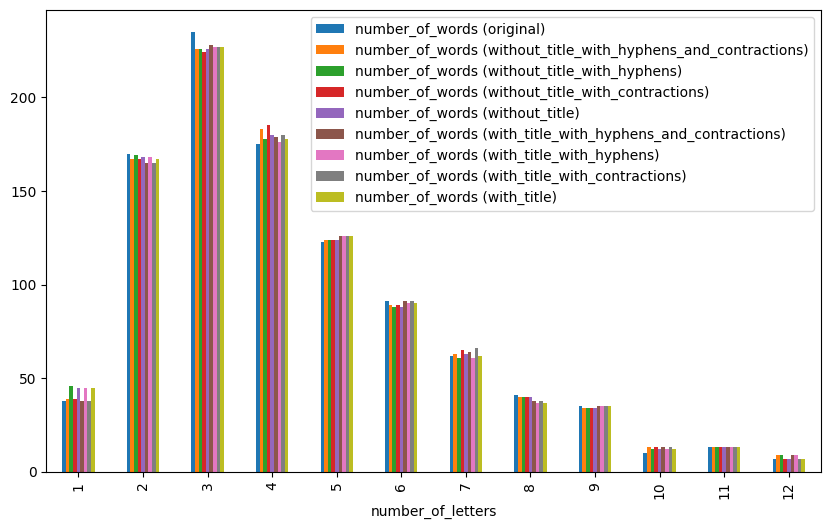

In [60]:
# plot the df
import matplotlib.pyplot as plt

df.plot(x="number_of_letters", y=["number_of_words (original)", "number_of_words (without_title_with_hyphens_and_contractions)", "number_of_words (without_title_with_hyphens)", "number_of_words (without_title_with_contractions)", "number_of_words (without_title)", "number_of_words (with_title_with_hyphens_and_contractions)", "number_of_words (with_title_with_hyphens)", "number_of_words (with_title_with_contractions)", "number_of_words (with_title)"], kind="bar", figsize=(10, 6))


In [64]:
# calculate the difference between the original and the other snippets
diffs = {}
for snippet in word_length_counts:
    diffs[snippet] = {}
    for length in word_length_counts[snippet]:
        if length-1 < len(data["number_of_words (original)"]):
            diffs[snippet][length] = abs(word_length_counts[snippet][length] - data["number_of_words (original)"][length-1])
        else:
            diffs[snippet][length] = 0

# create a df for the diffs
diffs_df = pd.DataFrame(diffs)
display(diffs_df)

,without_title_with_hyphens_and_contractions,without_title_with_hyphens,without_title_with_contractions,without_title,with_title_with_hyphens_and_contractions,with_title_with_hyphens,with_title_with_contractions,with_title
5,1.0,1.0,1.0,1.0,3,3,3,3
6,2.0,3.0,2.0,3.0,0,1,0,1
9,1.0,1.0,1.0,1.0,0,0,0,0
2,3.0,1.0,3.0,2.0,5,2,5,3
1,1.0,8.0,1.0,7.0,0,7,0,7
7,1.0,1.0,3.0,1.0,2,1,4,0
4,8.0,3.0,10.0,5.0,4,1,5,3
3,9.0,9.0,11.0,9.0,7,8,8,8
10,3.0,2.0,3.0,2.0,3,2,3,2
8,1.0,1.0,1.0,1.0,3,4,3,4


In [65]:
# calculate the total difference
diffs_df.sum()

without_title_with_hyphens_and_contractions    32.0
without_title_with_hyphens                     32.0
without_title_with_contractions                36.0
without_title                                  32.0
with_title_with_hyphens_and_contractions       29.0
with_title_with_hyphens                        31.0
with_title_with_contractions                   31.0
with_title                                     31.0
dtype: float64

In [66]:
# which snippet has the most zeros?
diffs_df.eq(0).sum()

without_title_with_hyphens_and_contractions    1
without_title_with_hyphens                     1
without_title_with_contractions                2
without_title                                  2
with_title_with_hyphens_and_contractions       5
with_title_with_hyphens                        3
with_title_with_contractions                   6
with_title                                     5
dtype: int64

Since we have the original data, it doesn't matter which one is best. It's just an exercise in recovering the original methodology, which human error makes very difficult anyway.

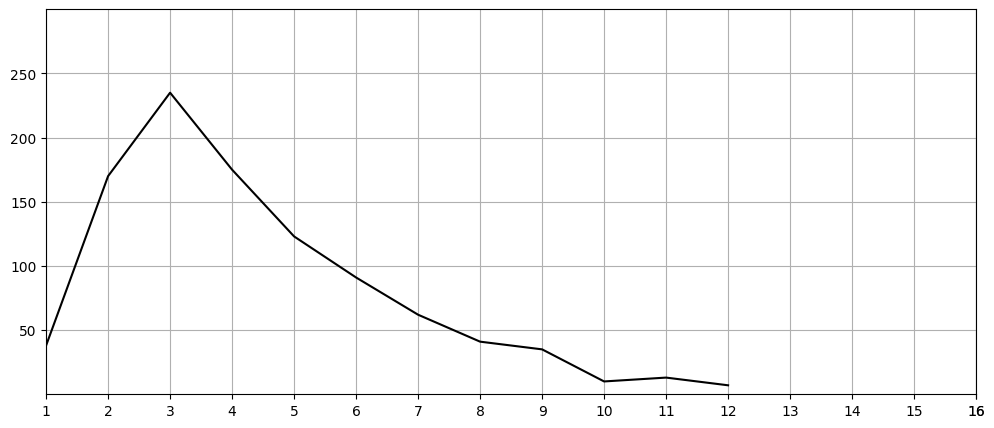

In [97]:
# plot the original data
import matplotlib.pyplot as plt

# to replicate original plot, we need to increase the x range to 16 even though we only have data up to 12
# we also want a grid for the whole thing
plt.figure(figsize=(12, 5))
# line plot
plt.plot(data["number_of_letters"], data["number_of_words (original)"], label="Original", color="black")
plt.grid(True)
plt.xticks(range(1, 17))
# align 1 with the first tick
plt.xlim(1, 16)
# relabel last tick as 16
plt.xticks(list(plt.xticks()[0]) + [16])
plt.ylim(0, 300)
# don't show first or last tick
plt.yticks(list(plt.yticks()[0])[1:-1])
plt.show()


